<a href="https://colab.research.google.com/github/Nagesh-Cheripally/Predicting-Customer-Lifetime-Value/blob/main/Predicting_Customer_Lifetime_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Customer Lifetime Value (CLV) = how much a company expects to earn from an average customer in a life time.

CLV allows to benchmark customers and identify how much money the company can afford to spend on customer acquisition.

Historical CLV = the sum of revenues of all customer transactions multiplied by average or product-level profit margin

Problems with historical CLV:

- doesn't account for customer tenure, retention or churn (e.g. if the company is growing its customer base, historical CLV will be deflated due to short tenure)
- doesn't account for new customers and their future revenue

Basic CLV = Average Revenue Profit Margin Average Lifespan
(where Average Lifespan is e.g. average time before customer churn)

Granular CLV = (Average Revenue per Transaction Average Frequency Profit Margin) * Average Lifespan
(where Avg Frequency is within the certain timeframe, e.g. a month)
accounts for each transaction

Traditional CLV = (Average Revenue Profit Margin) Retention Rate / Churn Rate
(where Churn = 1 - Retention Rate)

Retention/Churn - a proxy of expected length of customer lifespan with the company



In [263]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
import io


In [114]:
from google.colab import files
upload = files.upload()

Saving WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv to WA_Fn-UseC_-Marketing-Customer-Value-Analysis (1).csv


In [264]:
df = pd.read_csv(io.BytesIO(upload['WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv']))

In [265]:
df.shape

(9134, 24)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [267]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [268]:
df.dtypes.value_counts()

object     16
int64       6
float64     2
dtype: int64

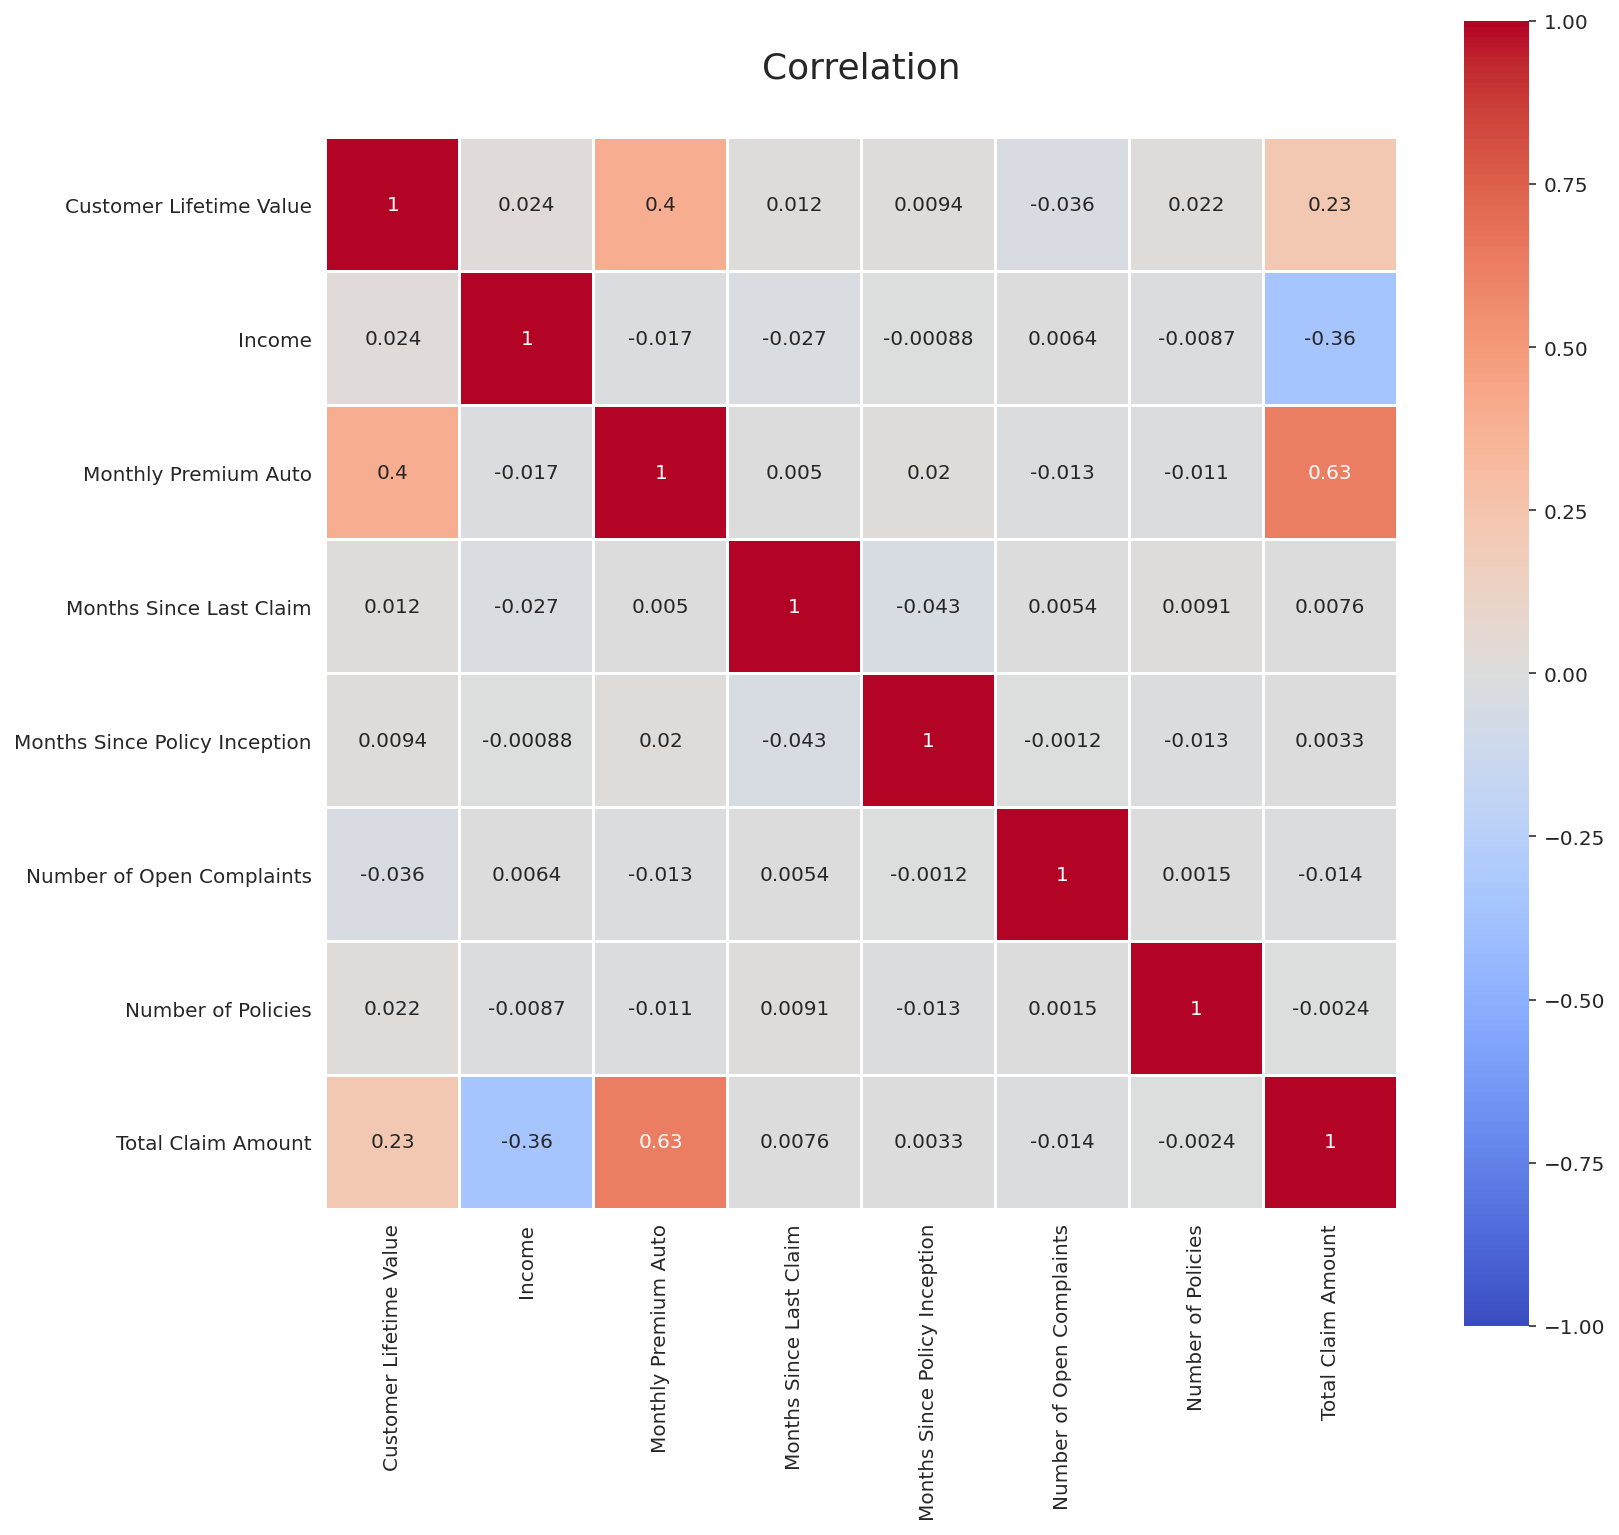

In [276]:
# Correlation check
CorrMatrix = df.corr()
plt.figure(figsize=(12,12))
heatmap = sns.heatmap(CorrMatrix, annot=True, vmin = -1, vmax = 1,linewidths = 1, square = 'true', cmap="coolwarm")
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=30)
plt.show()

In [277]:
df1 = df.copy(deep = True)
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


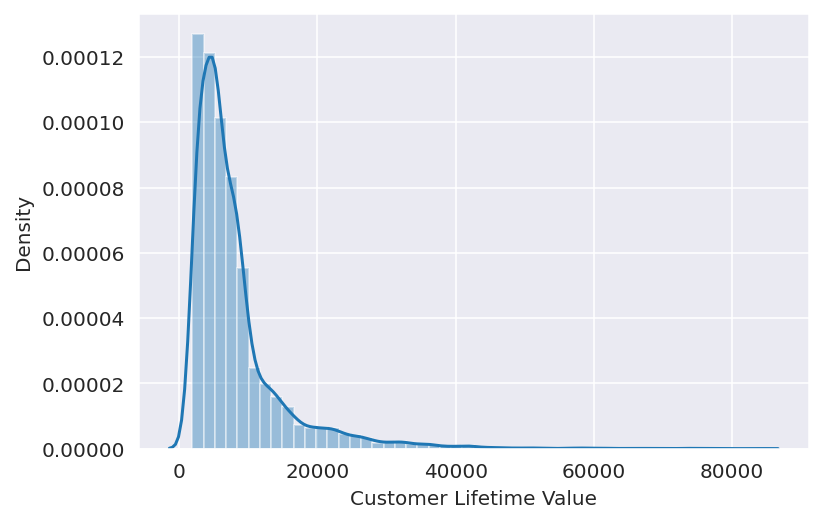

In [278]:
sns.distplot(df['Customer Lifetime Value'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 8004.94 and sigma = 6870.59


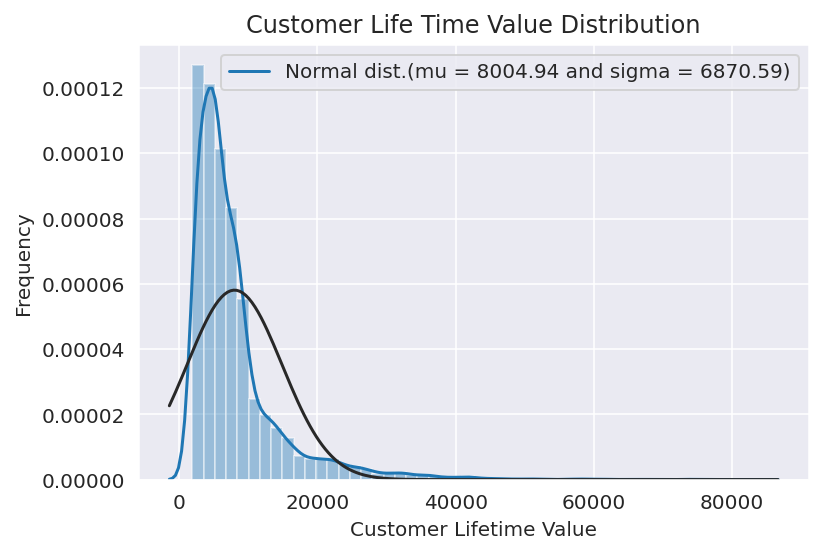

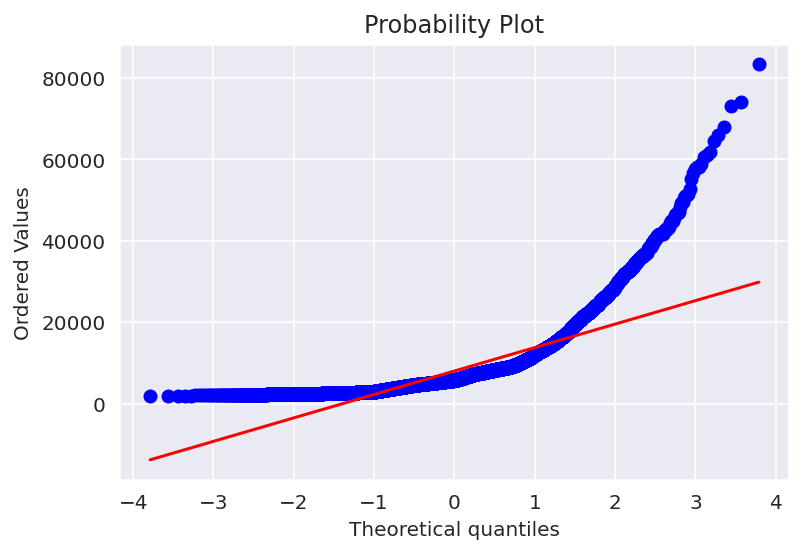

In [279]:
from scipy import stats
from scipy.stats import norm,skew

sns.distplot(df1['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df1['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['Customer Lifetime Value'],plot = plt)
plt.show()

Target variable is skewed with a skewness of 3.03 which indicates presence of outliers, let's apply log transform 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 8.75 and sigma = 0.65


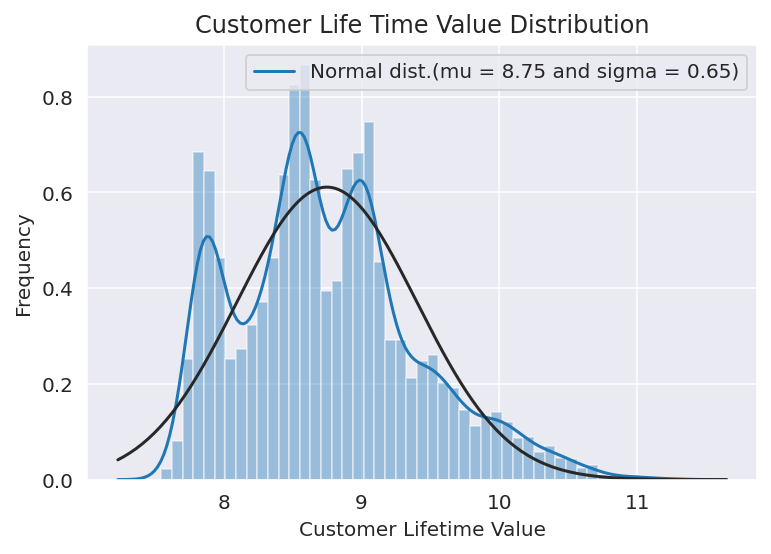

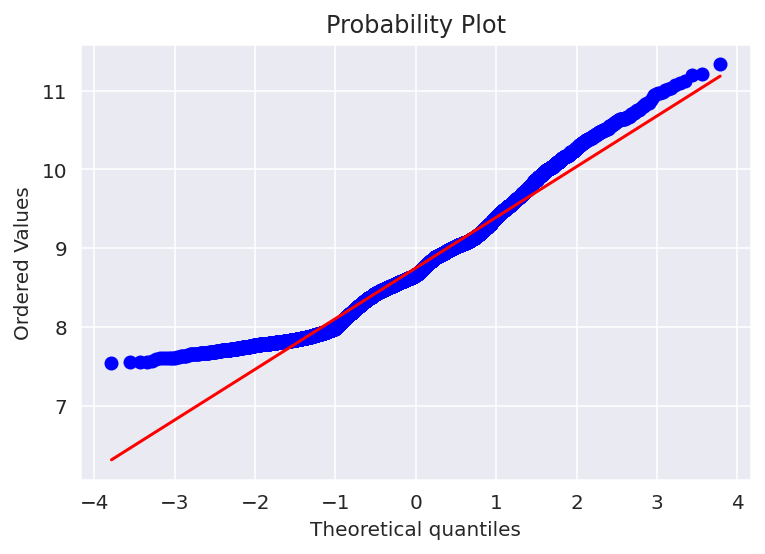

In [140]:
df1['Customer Lifetime Value'] = np.log1p(df1['Customer Lifetime Value'])
sns.distplot(df1['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df1['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['Customer Lifetime Value'],plot = plt)
plt.show()

In [141]:
print('skewness before transformation:',df['Customer Lifetime Value'].skew())
print('skewness after transformation:',df1['Customer Lifetime Value'].skew())

skewness before transformation: 3.032280259929985
skewness after transformation: 0.5761717967456804


In [142]:
df1 = df1.drop(['Customer','Customer Lifetime Value','Effective To Date'],axis = 1)
df_cat1 = df1.select_dtypes(include = ['object'])
df_cat1.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


The pie charts show the percentage of customers in each category of the categorical variables¶


In [145]:
df_num = df.select_dtypes(include=['int64','float'])
df_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [147]:
def get_redundant_pairs(df_num):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df_num.columns
    for i in range(0, df_num.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df_num, n=5):
    au_corr = df_num.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_num)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_num, 40))

Top Absolute Correlations
Monthly Premium Auto           Total Claim Amount               0.632017
Customer Lifetime Value        Monthly Premium Auto             0.396262
Income                         Total Claim Amount               0.355254
Customer Lifetime Value        Total Claim Amount               0.226451
Months Since Last Claim        Months Since Policy Inception    0.042959
Customer Lifetime Value        Number of Open Complaints        0.036343
Income                         Months Since Last Claim          0.026715
Customer Lifetime Value        Income                           0.024366
                               Number of Policies               0.021955
Monthly Premium Auto           Months Since Policy Inception    0.020257
Income                         Monthly Premium Auto             0.016665
Number of Open Complaints      Total Claim Amount               0.014241
Months Since Policy Inception  Number of Policies               0.013333
Monthly Premium Auto     

In [148]:
df_num_corr = df_num.corr()['Customer Lifetime Value'].sort_values(ascending=False)
df_num_corr

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64

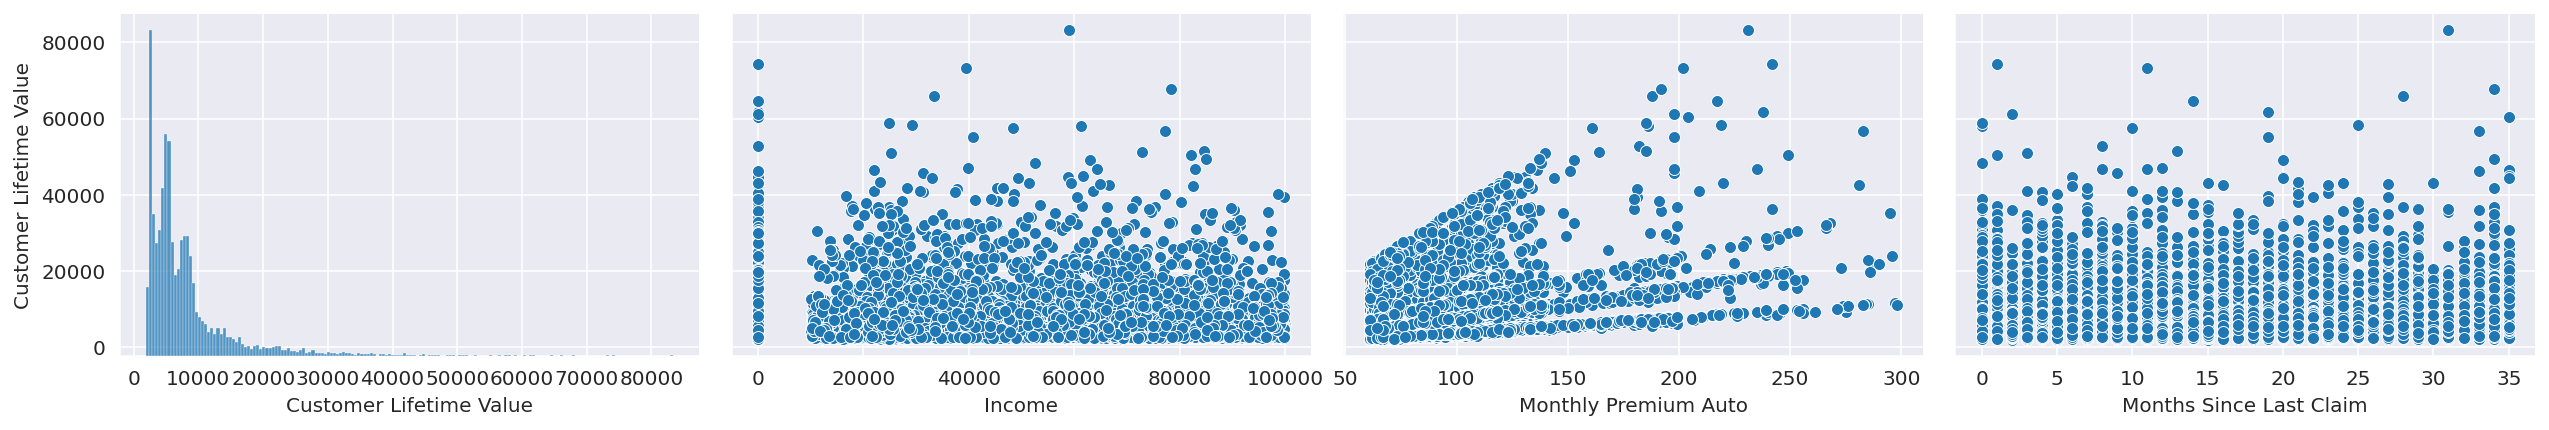

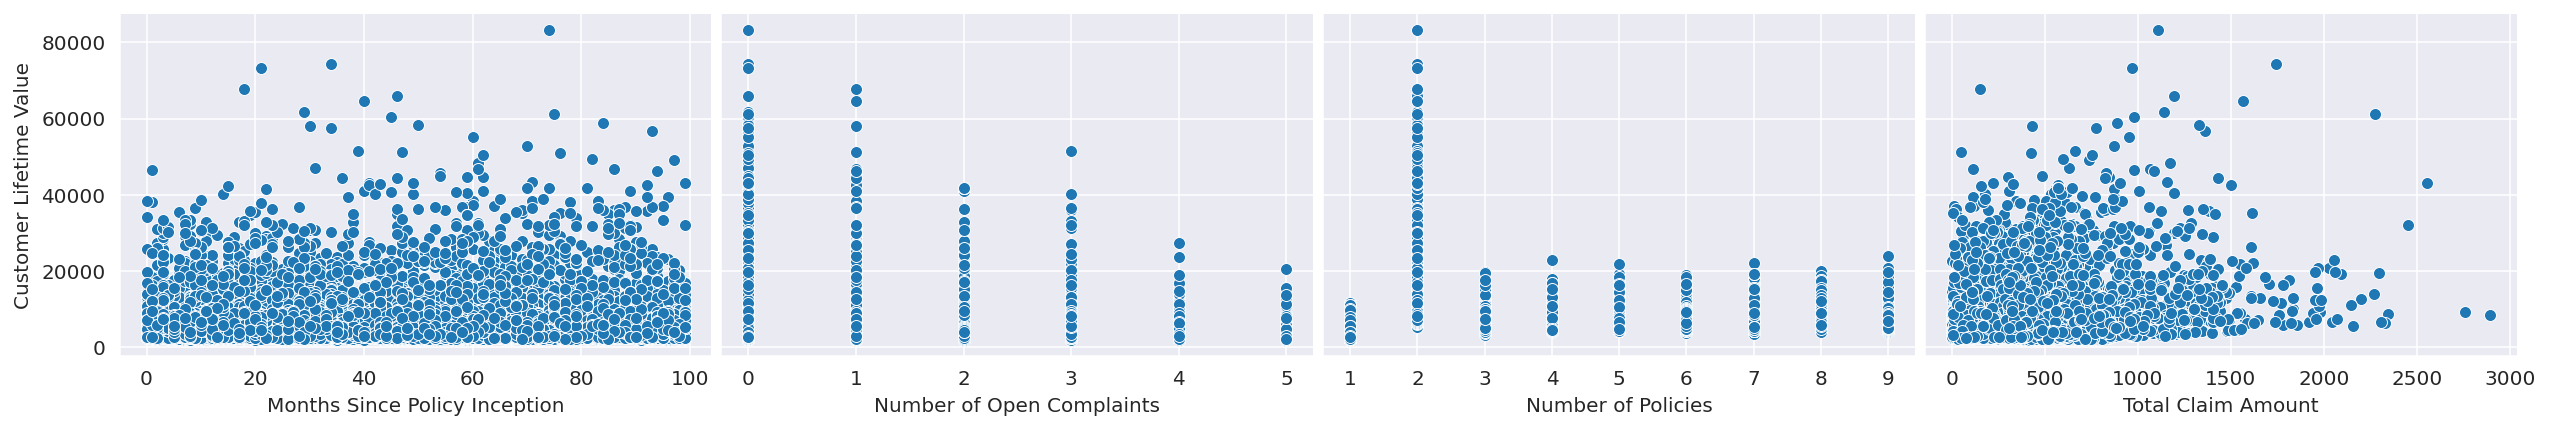

In [255]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['Customer Lifetime Value'], 
                height=3, corner = False, aspect = 1.5)

In [286]:
y = df['Customer Lifetime Value']
y.head(5)

0     2763.519279
1     6979.535903
2    12887.431650
3     7645.861827
4     2813.692575
Name: Customer Lifetime Value, dtype: float64

In [167]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.shape

(9134, 50)

In [168]:
num_features = df.dtypes[df.dtypes != 'object'].index
skewed_feat = df[num_features].apply(lambda x: x.skew()).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feat,columns = ['skew'])
skewness

,skew
Customer Lifetime Value,3.032280
Number of Open Complaints,2.783263
Monthly Premium Auto,2.123546
Total Claim Amount,1.714966
Number of Policies,1.253333
Income,0.286887
Months Since Last Claim,0.278586
Months Since Policy Inception,0.040165


In [169]:
from scipy.special import boxcox1p
skewness_feat = ['Monthly Premium Auto','Total Claim Amount']
lam = 0.15
for i in skewness_feat:
    df1[i] = boxcox1p(df1[i],lam)

In [170]:
skewness_feat

['Monthly Premium Auto', 'Total Claim Amount']

In [171]:
import statsmodels.api as sm
Xc = sm.add_constant(df1)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.170
Model:                                 OLS   Adj. R-squared:                  0.166
Method:                      Least Squares   F-statistic:                     38.85
Date:                     Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                             12:54:32   Log-Likelihood:                -92807.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9085   BIC:                         1.861e+05
Df Model:                               48                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.777e+04   3201.327     -5.550      0.000    -2.4e+04   -1.15e+04
Income                            -0.0016      0.004     -0.420      0.674      -0.009       0.006
Monthly Premium Auto            3958.6659    540.617      7.322      0.000    2898.934    5018.397
Months Since Last Claim            7.5271      6.549      1.149      0.250      -5.310      20.364
Months Since Policy Inception     -1.3830      2.379     -0.581      0.561      -6.046       3.280
Number of Open Complaints       -262.4445     72.453     -3.622      0.000    -404.469    -120.420
Number of Policies                55.5714     27.743      2.003      0.045       1.190     109.953
Total Claim Amount                88.8594     76.812      1.157      0.247     -61.710     239.429
State_California                  30.3018    189.330      0.160      0.873    -340.827     401.430
State_Nevada                      23.8488    261.033      0.091      0.927    -487.835     535.532
State_Oregon                      91.0956    195.944      0.465      0.642    -292.999     475.190
State_Washington                 182.9220    269.817      0.678      0.498    -345.980     711.824
Response_Yes                    -179.7431    207.128     -0.868      0.386    -585.761     226.275
Coverage_Extended               -284.1983    281.746     -1.009      0.313    -836.484     268.087
Coverage_Premium                -371.4872    544.803     -0.682      0.495   -1439.424     696.450
Education_College                 -9.0076    171.144     -0.053      0.958    -344.488     326.473
Education_Doctor                -167.2398    362.753     -0.461      0.645    -878.317     543.837
Education_High School or Below   367.0768    173.235      2.119      0.034      27.498     706.656
Education_Master                 156.6972    262.718      0.596      0.551    -358.289     671.683
EmploymentStatus_Employed        708.3178    354.255      1.999      0.046      13.899    1402.737
EmploymentStatus_Medical Leave   173.8684    435.917      0.399      0.690    -680.627    1028.363
EmploymentStatus_Retired          93.1548    502.482      0.185      0.853    -891.822    1078.132
EmploymentStatus_Unemployed      -56.9328    356.783     -0.160      0.873    -756.308     642.443
Gender_M                        -168.8049    132.832     -1.271      0.204    -429.186      91.577
Location Code_Suburban          -487.0965    345.427     -1.410      0.159   -1164.212     190.019
Location Code_Urban             -167.4939    305.340     -0.549      0.583    -766.029     431.041
Marital Status_Married          -181.6439    194.638     -0.933      0.351    -563.177     199.890
Marital Status_Single           -531.4468    224.505     -

In [173]:
y_transformed = np.log1p(y)

In [184]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(df1,y_transformed,test_size = 0.3,random_state=4)

In [185]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [186]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [187]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, model_selection, metrics

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_Y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_Y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_Y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_Y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

[13:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [188]:
model_data

[{'Name': 'Lasso: ',
  'Test_R2_Score': 0.0005580619672611586,
  'Test_RMSE_Score': 0.6577154413453797,
  'Train_R2_Score': 0.002001613210678155,
  'Train_Time': 0.0051152706146240234},
 {'Name': 'Ridge: ',
  'Test_R2_Score': 0.24637398524355725,
  'Test_RMSE_Score': 0.571132920974468,
  'Train_R2_Score': 0.2761926699976962,
  'Train_Time': 0.030844449996948242},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': -0.0591782906411118,
  'Test_RMSE_Score': 0.6770859294683645,
  'Train_R2_Score': 0.3011088417597564,
  'Train_Time': 0.09151244163513184},
 {'Name': 'SVR:',
  'Test_R2_Score': -0.01021793702911622,
  'Test_RMSE_Score': 0.6612516841602443,
  'Train_R2_Score': -0.005649243044175911,
  'Train_Time': 4.45613694190979},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.910839305149915,
  'Test_RMSE_Score': 0.1964472599525977,
  'Train_R2_Score': 0.9876083628191555,
  'Train_Time': 5.653756856918335},
 {'Name': 'ExtraTreeRegressor :',
  'Test_R2_Score': 0.8959578535256145,
  'Test

In [233]:
# Convert list to dataframe
df2 = pd.DataFrame(model_data)
df2

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.005115,0.002002,0.000558,0.657715
1,Ridge:,0.030844,0.276193,0.246374,0.571133
2,KNeighborsRegressor:,0.091512,0.301109,-0.059178,0.677086
3,SVR:,4.456137,-0.005649,-0.010218,0.661252
4,RandomForest,5.653757,0.987608,0.910839,0.196447
5,ExtraTreeRegressor :,5.639719,1.000000,0.895958,0.212209
6,GradientBoostingClassifier:,1.704477,0.912607,0.902788,0.205125
7,XGBRegressor:,0.915003,0.912069,0.902596,0.205327
8,MLPRegressor:,1.110807,-7.584795,-7.370992,1.903477


In [235]:
df3 = df2.drop([8])

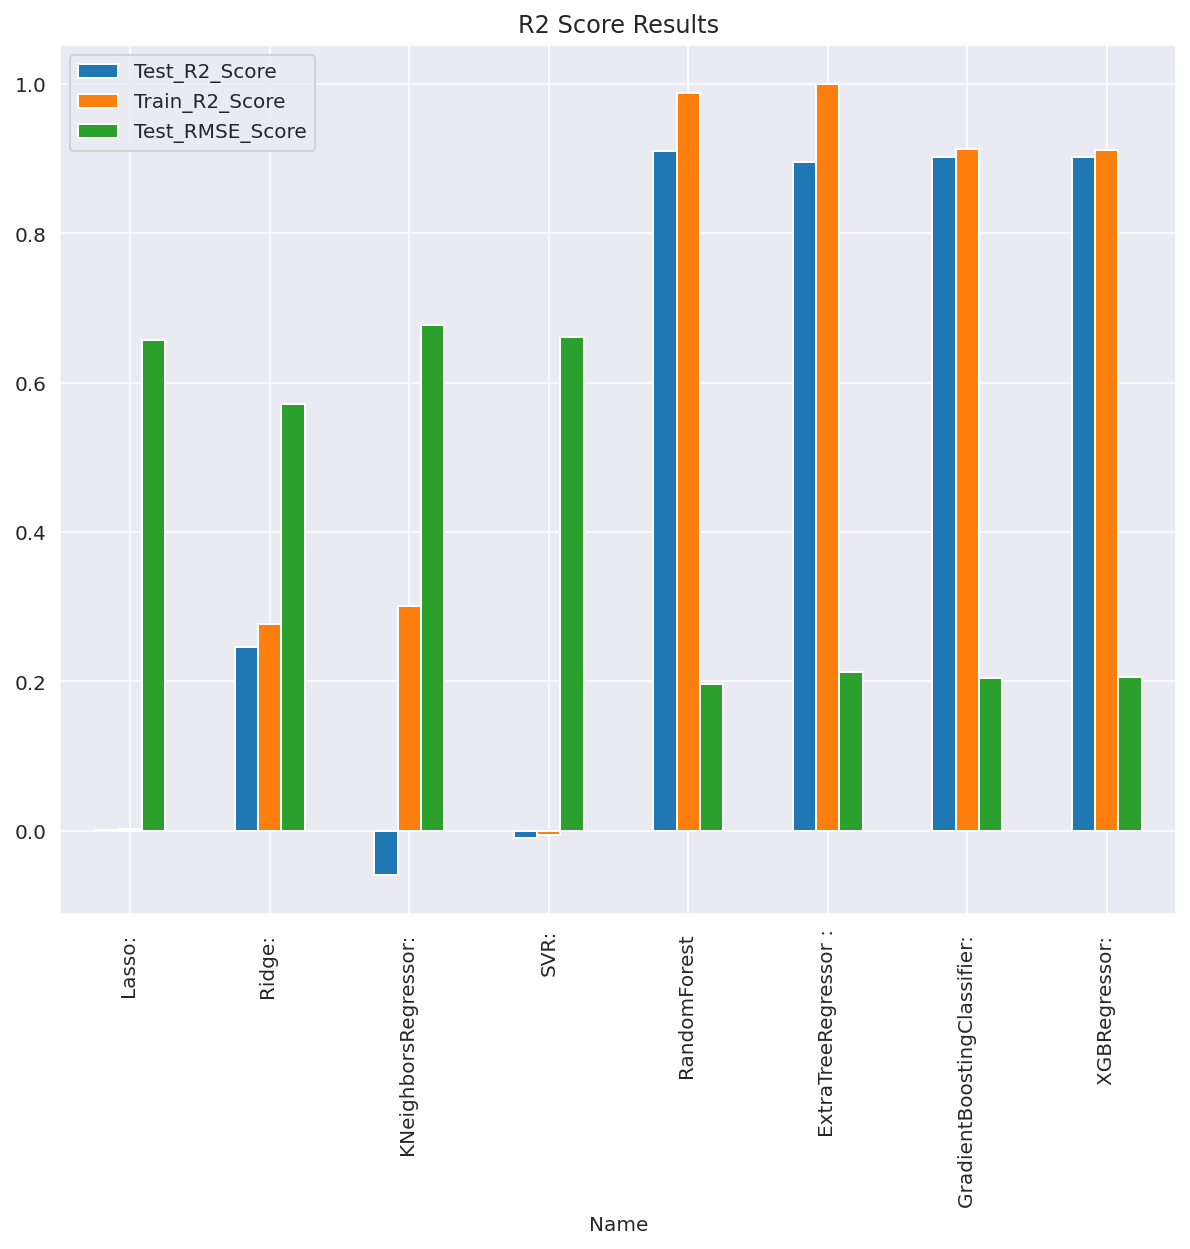

In [287]:
# df2.plot(x = 'Name', y = 'Train_Time')
# df2.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'],

df3.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8))

In [209]:
# Parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = RandomForestRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 10.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=40,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [210]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 150}

In [212]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_Y)

0.9876447401690557

In [213]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_Y)

0.9113018224039928

In [214]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_Y, grid_search.best_estimator_.predict(test_X)))

0.19593706660214275

In [215]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

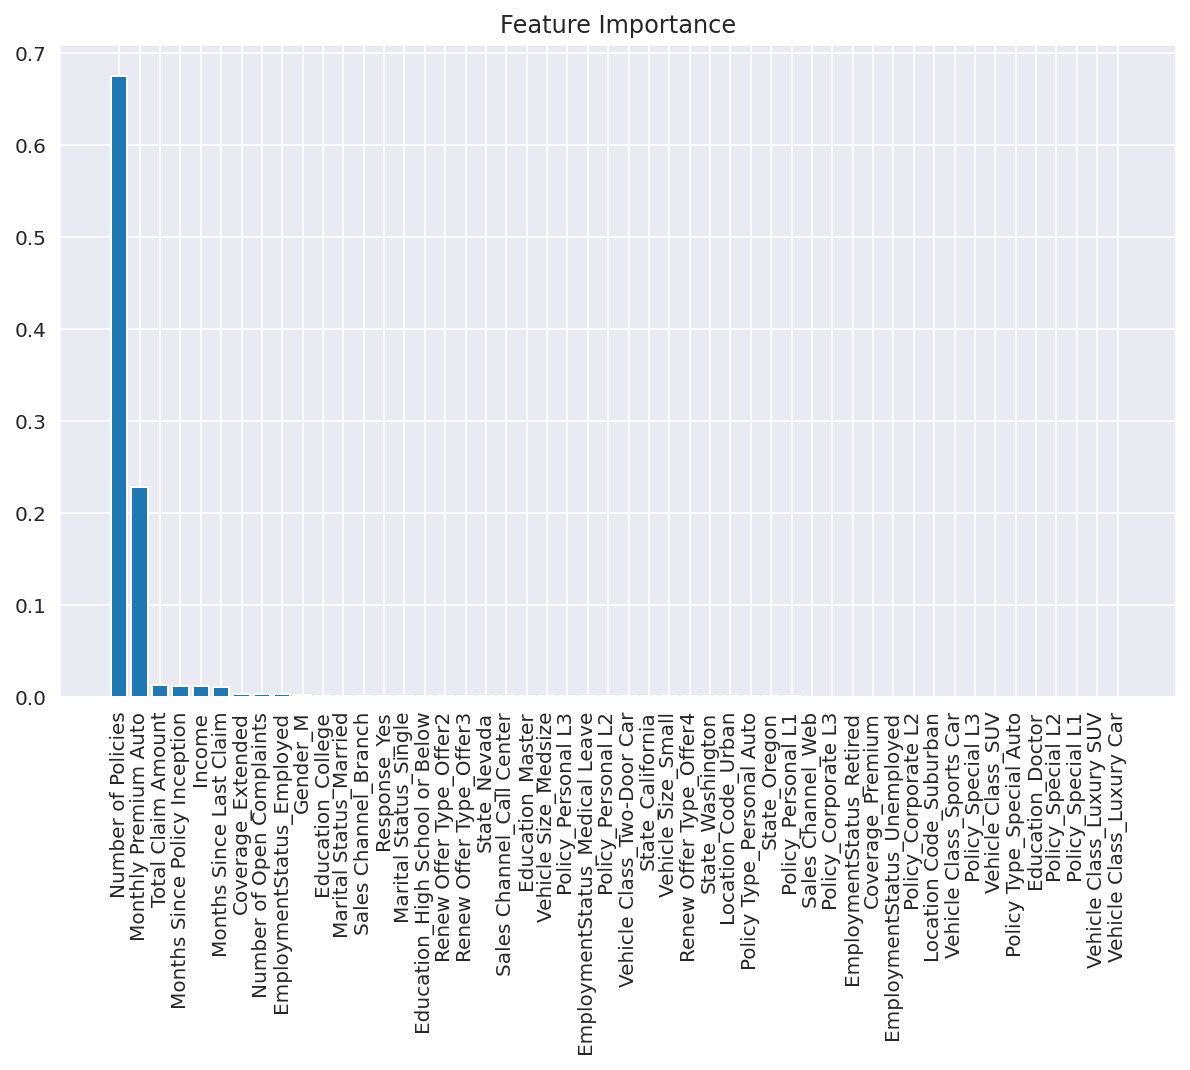

In [216]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [217]:
# Get top 5 most important feature 
names[0:5]

['Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Months Since Policy Inception',
 'Income']

In [218]:
# Get 5 least important feature 
names[-5:]

['Education_Doctor',
 'Policy_Special L2',
 'Policy_Special L1',
 'Vehicle Class_Luxury SUV',
 'Vehicle Class_Luxury Car']

In [219]:
# Reduce test & training set to 5 feature set
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [220]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [221]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [222]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(train_Y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_Y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_Y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9859438841477378
Testing set R2 Score -  0.9065766973794668
Testing set RMSE Score -  0.20108832725766795




Results / Conclusion

```
1. The best Algorithm to use for this dataset is RandomForestRegressor
2. Untuned model was able to explain 90.65% of variance on test set 
3. Tuned model was able to explain 91.08% of varaince on test set which is increased by ~0.5
4. Feature reduction was not able to add to better R2 score
```

